Name:- Saurabh Mittal

Data Science and Business Analytics: Task #3 (Prediction using Decision Tree Algorithm)

Problem statement: For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics

# Data Import

In [2]:
data  = pd.read_csv("/content/drive/My Drive/Dataset/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


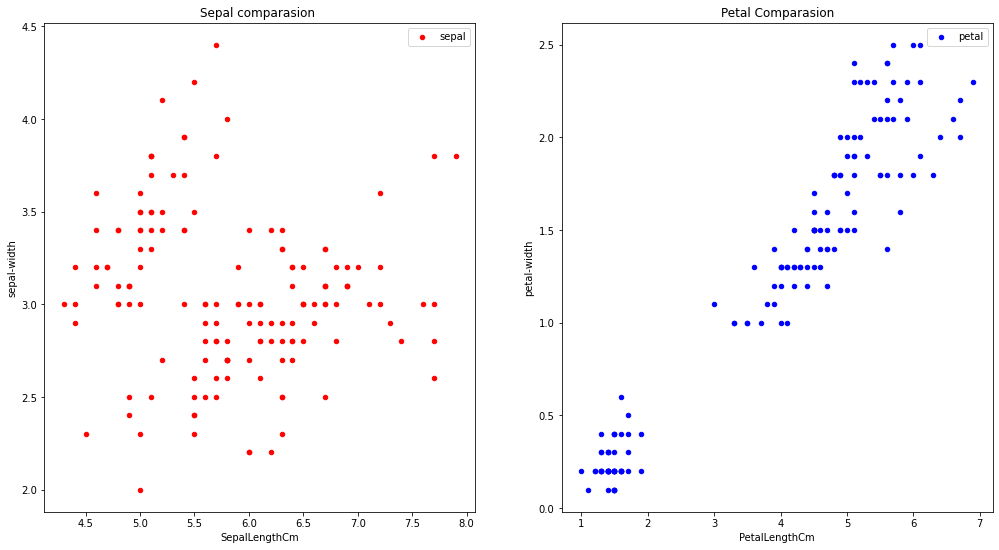

In [5]:
fig,ax=plt.subplots(1,2,figsize=(17, 9))

data.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
data.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

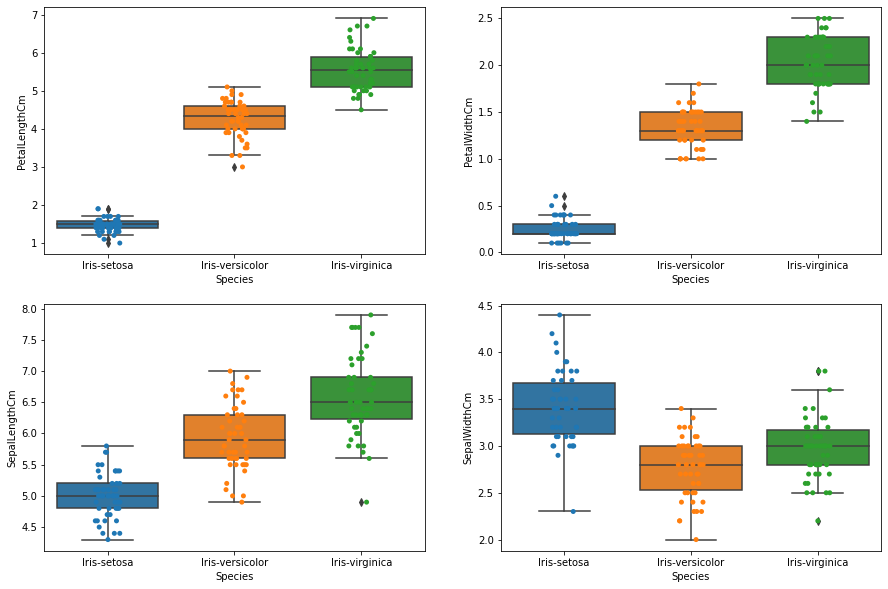

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=data)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray")

plt.subplot(2,2,2)
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=data)
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=data, jitter=True, edgecolor="gray")

plt.subplot(2,2,3)
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=data)
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=data, jitter=True, edgecolor="gray")

plt.subplot(2,2,4)
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=data)
ax = sns.stripplot(x="Species", y="SepalWidthCm", data=data, jitter=True, edgecolor="gray")

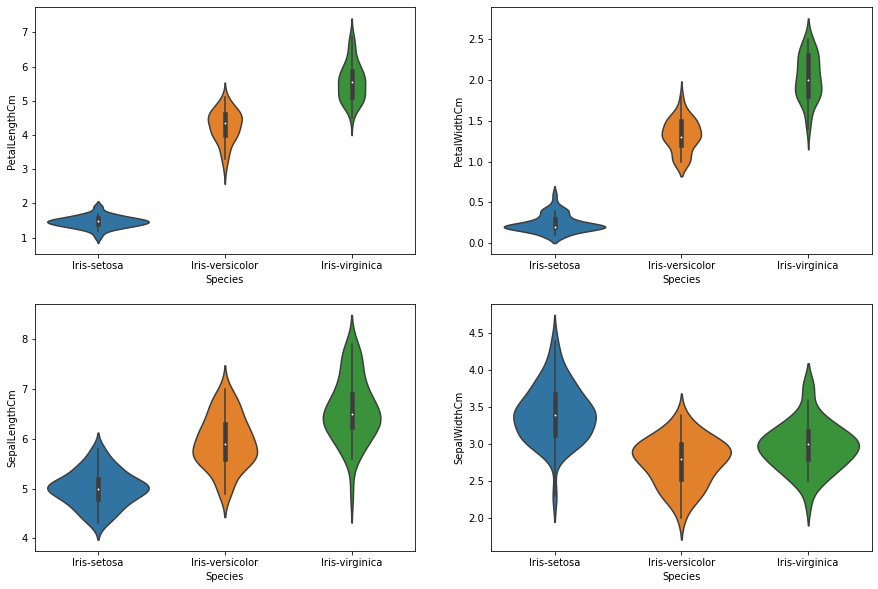

In [7]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

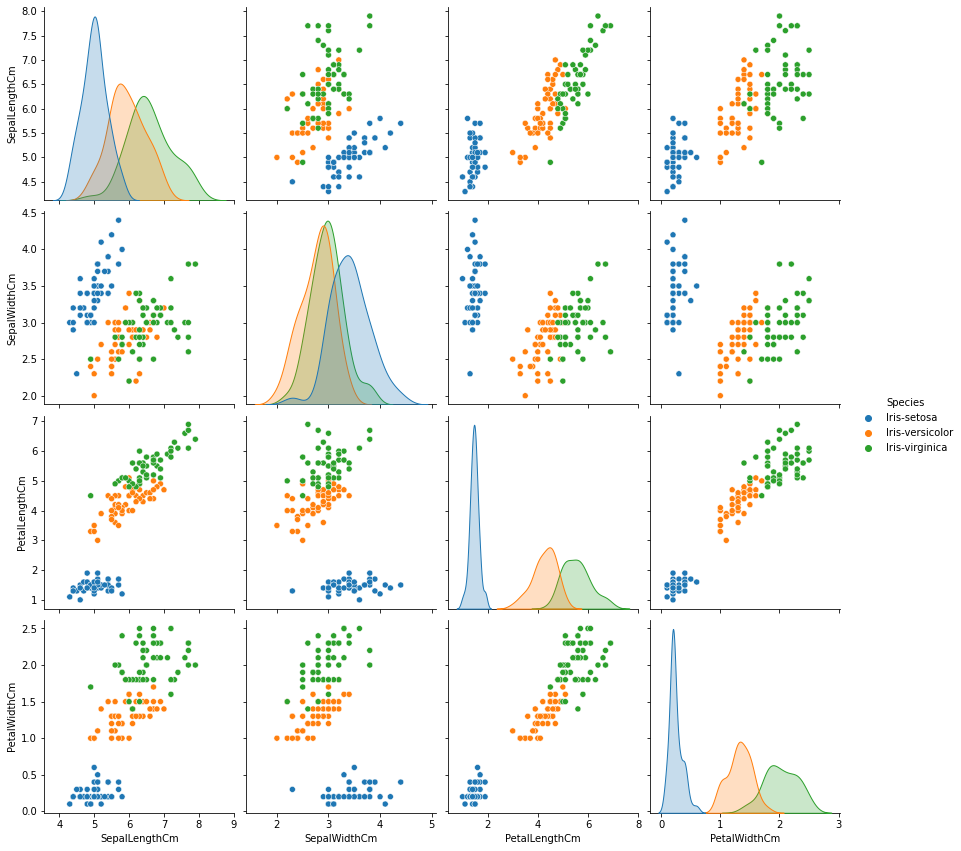

In [8]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3, diag_kind="kde")

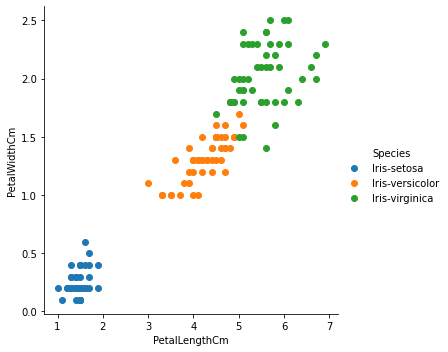

In [9]:
sns.FacetGrid(data, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

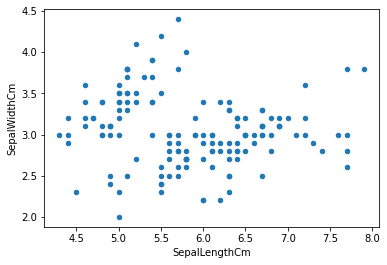

In [10]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

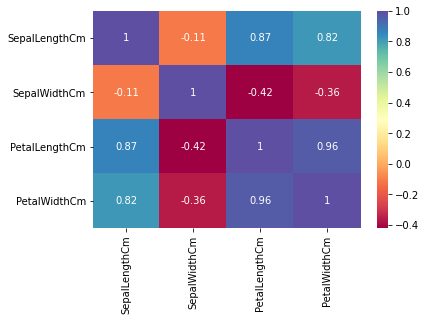

In [11]:
sns.heatmap(data.drop(['Id'], axis=1).corr(),annot=True,cmap="Spectral")
plt.show()

Data Preprocessing

In [12]:
x = data.drop(['Species'], axis=1)
y  = data['Species']

In [13]:
y = LabelEncoder().fit_transform(y)

In [14]:
estimator = tree.DecisionTreeClassifier()
scores = model_selection.cross_val_score(estimator = estimator, X = x, y = y, cv = 7)
print('The average accuracy score with {} is: '.format(estimator),scores.mean() * 100)

The average accuracy score with DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:  92.76437847866418


In [15]:
estimator = tree.ExtraTreeClassifier()
scores = model_selection.cross_val_score(estimator = estimator, X = x, y = y, cv = 7)
print('The average accuracy score with {} is: '.format(estimator),scores.mean() * 100)

The average accuracy score with ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random') is:  92.05318491032777


In [16]:
estimator = ensemble.RandomForestClassifier()
scores = model_selection.cross_val_score(estimator = estimator, X = x, y = y, cv = 7)
print('The average accuracy score with {} is: '.format(estimator),scores.mean() * 100)

The average accuracy score with RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:  98.67037724180582


In [17]:
estimator = ensemble.GradientBoostingClassifier()
scores = model_selection.cross_val_score(estimator = estimator, X = x, y = y, cv = 7)
print('The average accuracy score with {} is: '.format(estimator),scores.mean() * 100)

The average accuracy score with GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:  95.36178107606679


In [18]:
estimator = ensemble.AdaBoostClassifier()
scores = model_selection.cross_val_score(estimator = estimator, X = x, y = y, cv = 7)
print('The average accuracy score with {} is: '.format(estimator),scores.mean() * 100)

The average accuracy score with AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) is:  95.36178107606679


In [19]:
estimator = ensemble.BaggingClassifier()
scores = model_selection.cross_val_score(estimator = estimator, X = x, y = y, cv = 7)
print('The average accuracy score with {} is: '.format(estimator),scores.mean() * 100)

The average accuracy score with BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False) is:  95.36178107606679


In [20]:
dtc = tree.DecisionTreeClassifier().fit(x,y)

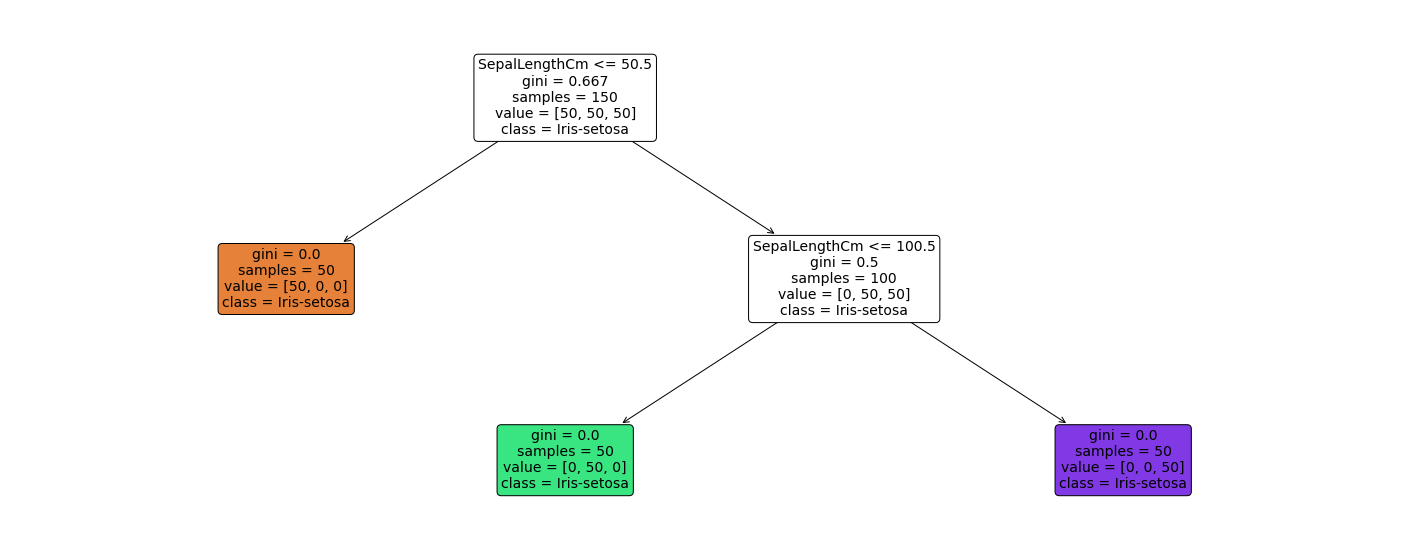

In [21]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(dtc, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
              class_names=data['Species'], filled=True, rounded=True, fontsize=14)